<a href="https://colab.research.google.com/github/MarianaTc18/BOX3/blob/main/Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais Convolucionais**

**Disciplina:** Inteligência Computacional - Seminário Final \\
**Professor:** Jarbas Joaci de Mesquita Sá Junior \\
**Equipe:**
>> João Victor Duarte
>> José Guilherme Arruda de Oliveira \\
>> José Mateus Mota da Silva \\
>> Mariana Teixeira de Castro \\
>> Sávio Araújo Gomes \\
>> Tailson Vasconcelos Alves \\
>> Vinicius Teixeira Costa \\


## **Classificação de imagens de um conjunto de dados de linguagem de sinais americana**

Realizaremos as etapas de preparação de dados, criação de modelo e treinamento de modelo que observamos na última seção usando um conjunto de dados diferente: imagens de mãos fazendo letras em linguagem de sinais americana.

### **Objetivos**

*   Preparar dados para treino.
*   Criar e compilar um modelo simples de classificação.
* Treine um modelo CNN e observar seu desempenho.



O alfabeto da linguagem de sinais americana contém 26 letras. Duas dessas letras (j e z) requerem movimento, portanto não estão incluídas no conjunto de dados de treinamento. (Fonte: http://www.kaggle.com)


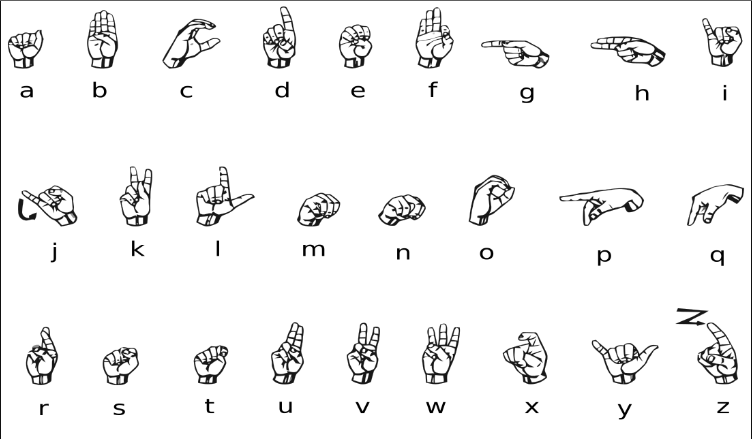

### **Acessando os dados**

O conjunto de dados de linguagem de sinais está no formato CSV (valores separados por vírgula), a mesma estrutura de dados do Microsoft Excel e do Planilhas Google.

Para carregar e trabalhar com os dados, usaremos uma biblioteca chamada Pandas, que é uma ferramenta de alto desempenho para carregar e manipular dados. Leremos os arquivos CSV em um formato chamado DataFrame.

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv("asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("asl_data/sign_mnist_valid.csv")

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179



### Extraindo os rótulos

Aqui armazenamos nossos rótulos de treinamento e validação nas variáveis ​​**y_train** e **y_valid** ​​e depois excluímos os rótulos dos nossos dataframes originais, onde eles não são mais necessários:

#### Separando nossos valores alvo

In [6]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

#### Separando nossos vetores de imagem

In [7]:
x_train = train_df.values
x_valid = valid_df.values

### Resumindo os dados de treinamento e validação

Temos agora 27.455 imagens com 784 pixels cada para treinamento...

In [8]:
x_train.shape

(27455, 784)

...bem como seus rótulos correspondentes:

In [9]:
y_train.shape

(27455,)

Para validação, temos 7.172 imagens...

In [10]:
x_valid.shape

(7172, 784)

...e seus rótulos correspondentes:

In [11]:
y_valid.shape

(7172,)

### **Visualizando os Dados dos arquivos CSVs como imagens**

Para visualizar as imagens, utilizaremos a biblioteca matplotlib.

Observe que teremos que remodelar os dados de seu formato 1D atual de 784 pixels para um formato 2D de 28x28 pixels para dar sentido à imagem:

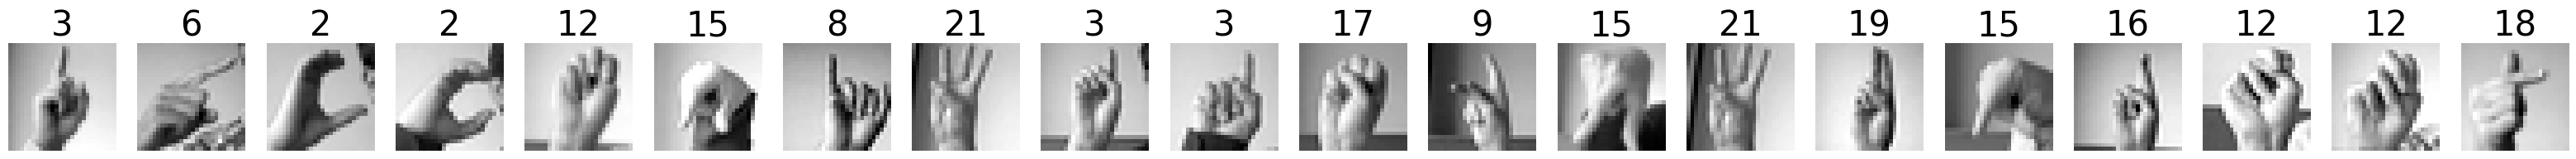

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## **Redes Neurais Convolucionais**



TensorFlow é uma plataforma ponta a ponta de código aberto, uma biblioteca para várias tarefas de aprendizado de máquina, enquanto Keras é uma biblioteca de rede neural de alto nível executada sobre o TensorFlow. Ambos fornecem APIs de alto nível usadas para construir e treinar modelos facilmente. Utilizaremos a biblioteca TensorFlow para realizar o treinamento da nossa rede neural.

In [13]:
import tensorflow.keras as keras

#### Transformando nossos alvos escalares em categorias binárias

In [14]:
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

#### Normalizando nossos dados

In [15]:
x_train = x_train / 255
x_valid = x_valid / 255

#### Remodelando imagens para uma CNN

In [16]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

Neste formato, não temos todas as informações sobre quais pixels estão próximos uns dos outros. Por causa disso, não podemos aplicar convoluções que detectem recursos. Vamos remodelar nosso conjunto de dados para que fiquem no formato de 28x28 pixels. Isso permitirá que nossas convoluções associem grupos de pixels e detectem recursos importantes.

Observe que para a primeira camada convolucional do nosso modelo, precisamos ter não apenas a altura e a largura da imagem, mas também o número de canais de cores. Nossas imagens estão em tons de cinza, então teremos apenas 1 canal.

Isso significa que precisamos converter a forma atual (27455, 784) em (27455, 28, 28, 1). Por conveniência, podemos passar o método reshape a -1 para qualquer dimensão que desejamos que permaneça a mesma, portanto:

In [17]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [18]:
x_train.shape

(27455, 28, 28, 1)

In [19]:
x_valid.shape

(7172, 28, 28, 1)

In [20]:
x_train.shape, x_valid.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

### **Criando um MOdelo Convolucional**



Estas são nossas camadas convolucionais 2D. Kernels pequenos examinarão a imagem de entrada e detectarão recursos que são importantes para a classificação. As convoluções anteriores do modelo detectarão recursos simples, como linhas. As convoluções posteriores detectarão recursos mais complexos. Vejamos nossa primeira camada Conv2D:

model.add(Conv2D(75 , (3,3) , passadas = 1 , preenchimento = 'mesmo'...)
75 refere-se ao número de filtros que serão aprendidos. (3,3) refere-se ao tamanho desses filtros. Os avanços referem-se ao tamanho do passo que o filtro executará ao passar pela imagem. O preenchimento refere-se a se a imagem de saída criada a partir do filtro corresponderá ao tamanho da imagem de entrada.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

**Normalização em lote:** Assim como a normalização de nossas entradas, a normalização em lote dimensiona os valores nas camadas ocultas para melhorar o treinamento.

**MaxPool2D:** O pool máximo pega uma imagem e essencialmente a reduz para uma resolução mais baixa. Ele faz isso para ajudar o modelo a ser robusto à translação (objetos movendo-se de um lado para o outro) e também torna nosso modelo mais rápido.

**Dropout:** Dropout é uma técnica para prevenir overfitting. O dropout seleciona aleatoriamente um subconjunto de neurônios e os desliga, para que eles não participem da propagação direta ou reversa naquela passagem específica. Isso ajuda a garantir que a rede seja robusta e redundante e não dependa de nenhuma área para encontrar respostas.

**Flatten:** Flatten pega a saída de uma camada que é multidimensional e a nivela em uma matriz unidimensional. A saída é chamada de vetor de características e será conectada à camada de classificação final.

**Dense:** Nossa primeira camada densa (512 unidades) toma o vetor de recursos como entrada e aprende quais recursos contribuirão para uma classificação específica. A segunda camada densa (24 unidades) é a camada de classificação final que produz nossa previsão.


In [22]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

#### Resumindo o modelo

Aqui, resumimos o modelo que acabamos de criar.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

## **Treinando o modelo**

In [24]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 118s 137ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.2387 - val_accuracy: 0.9532
Epoch 2/20
858/858 [==============================] - 122s 142ms/step - loss: 9.0478e-04 - accuracy: 0.9998 - val_loss: 0.2039 - val_accuracy: 0.9533
Epoch 3/20
858/858 [==============================] - 122s 142ms/step - loss: 3.5469e-04 - accuracy: 0.9999 - val_loss: 0.2358 - val_accuracy: 0.9636
Epoch 4/20
858/858 [==============================] - 118s 138ms/step - loss: 2.5074e-04 - accuracy: 0.9999 - val_loss: 0.3053 - val_accuracy: 0.9435
Epoch 5/20
858/858 [==============================] - 106s 124ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2307 - val_accuracy: 0.9488
Epoch 6/20
858/858 [==============================] - 118s 137ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2918 - val_accuracy: 0.9445
Epoch 7/20
858/858 [==============================] - 103s 120ms/step - loss: 7.4838e-04 - accuracy: 0.9998 - va

#### Analisando os Resultados

De acordo com as informações obtidas, a precisão do treinamento e a precisão da validação apresentaram indices muito altos, tornando este um ótimo resultado.

## **Aumento de dados**

Até agora, selecionamos uma arquitetura de modelo responsável por incrementar o desempenho do modelo, pois é projetada para reconhecer características importantes nas imagens. A precisão da validação ainda está atrasada em relação à precisão do treinamento, o que é um sinal de **overfitting**, ou seja, o modelo está ficando confuso com coisas que não viu antes ao testar o conjunto de dados de validação.

Para ensinar nosso modelo a ser mais robusto ao analisar novos dados, aumentaremos programaticamente o tamanho e a variação em nosso conjunto de dados. Isso é conhecido como aumento de dados, uma técnica útil para muitos aplicativos de aprendizado profundo.

O aumento no tamanho dá ao modelo mais imagens para aprender durante o treinamento. O aumento na variância ajuda o modelo a ignorar características sem importância e selecionar apenas as características que são realmente importantes na classificação, permitindo-lhe generalizar melhor.

Antes de compilar o modelo, é hora de configurar nosso aumento de dados.

Keras vem com uma classe de aumento de imagem chamada **ImageDataGenerator**. Esta aceita uma série de opções para aumentar nossos dados.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # gira imagens aleatoriamente no intervalo (graus, 0 a 180)
    zoom_range=0.1,  # zoom aleatório na imagem
    width_shift_range=0.1,  # desloca aleatoriamente as imagens horizontalmente (fração da largura total)
    height_shift_range=0.1,  # desloca aleatoriamente as imagens verticalmente (fração da altura total)
    horizontal_flip=True,  # vira imagens aleatoriamente na horizontal
    vertical_flip=False, # não vira imagens aleatoriamente na vertical
)

## **Tamanho do batch**

Outro benefício do ImageDataGenerator é que ele agrupa nossos dados em lotes para que nosso modelo possa ser treinado em uma amostra aleatória.

Se o modelo for verdadeiramente aleatório, o que significa que os dados estão devidamente embaralhados para que sejam justos como um baralho de cartas, então a nossa amostra pode fazer um bom trabalho ao representar todos os nossos dados, mesmo que seja uma pequena fração da população. Para cada etapa do treinamento, o modelo receberá um novo lote.

Na prática, um tamanho de lote de 32 e 64 funciona bem.

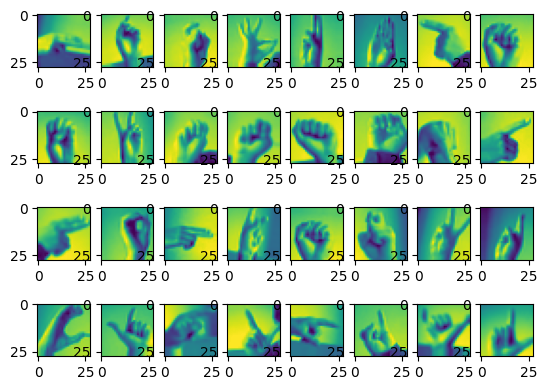

In [29]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

Next, the generator must be fit on the training dataset.

In [30]:
datagen.fit(x_train)

## **Treinamento com o Aumento da Dados**

Ao usar um gerador de dados de imagem com Keras, um modelo treina de maneira um pouco diferente: em vez de apenas passar os conjuntos de dados **x_train** e **y_train** para o modelo, passamos o gerador, chamando o fluxo. Isso faz com que as imagens sejam aumentadas ao vivo e na memória antes de serem passadas para o modelo para treinamento.

Os geradores podem fornecer uma quantidade indefinida de dados e, quando os usamos para treinar nossos dados, precisamos definir explicitamente por quanto tempo queremos que cada época seja executada, ou então a época continuará indefinidamente, com o gerador criando um número indefinido de dados. imagens aumentadas para fornecer o modelo.

Definimos explicitamente quanto tempo queremos que cada época seja executada usando o argumento nomeado **steps_per_epoch**. Como **steps * batch_size = number_of_images_trained in an epoch**, definimos o número de etapas igual ao tamanho do conjunto de dados não aumentado dividido pelo batch_size (que tem um valor padrão de 32).

Ese treinamento levará mais tempo do que o anterior, o que faz sentido, já que agora estamos treinando com mais dados do que antes:

In [31]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20
857/857 [==============================] - 118s 136ms/step - loss: 0.8519 - accuracy: 0.7977 - val_loss: 0.1347 - val_accuracy: 0.9589
Epoch 2/20
857/857 [==============================] - 135s 157ms/step - loss: 0.2623 - accuracy: 0.9158 - val_loss: 0.2961 - val_accuracy: 0.9200
Epoch 3/20
857/857 [==============================] - 137s 160ms/step - loss: 0.1817 - accuracy: 0.9442 - val_loss: 0.0968 - val_accuracy: 0.9639
Epoch 4/20
857/857 [==============================] - 114s 133ms/step - loss: 0.1447 - accuracy: 0.9548 - val_loss: 0.0212 - val_accuracy: 0.9950
Epoch 5/20
857/857 [==============================] - 110s 128ms/step - loss: 0.1202 - accuracy: 0.9622 - val_loss: 0.0804 - val_accuracy: 0.9767
Epoch 6/20
857/857 [==============================] - 115s 134ms/step - loss: 0.1089 - accuracy: 0.9677 - val_loss: 0.0578 - val_accuracy: 0.9828
Epoch 7/20
857/857 [==============================] - 109s 128ms/step - loss: 0.0947 - accuracy: 0.9701 - val_loss: 0.0447 -

In [33]:
model.save('asl_model')

#### Analisando os resultados

Você notará que a precisão da validação é maior e mais consistente. Isso significa que nosso modelo não está mais superajustado como antes, ou seja, generaliza melhor, fazendo melhores previsões sobre novos dados.

## **Testando nosso modelo**

Agora que temos um modelo bem treinado, é hora de usá-lo. Exporemos novas imagens ao nosso modelo e detectaremos as letras corretas do alfabeto da linguagem de sinais.

#### Preparando uma imagem para o modelo

Agora é hora de usar o modelo para fazermos previsões sobre novas imagens nunca vistas antes. Isso também é chamado de inferência.

Podemos notar que as imagens que temos têm resolução muito maior do que as imagens em nosso conjunto de dados. Eles também são coloridos. É importante lembrar que sempre que fizermos previsões com um modelo, a entrada deverá corresponder ao formato dos dados nos quais o modelo foi treinado. Para este modelo, o conjunto de dados de treinamento tinha o formato: (27455, 28, 28, 1). Isso correspondeu a 27.455 imagens de 28 por 28 pixels cada uma com um canal de cor (tons de cinza).

#### Mostrando as imagens

Quando usamos nosso modelo para fazer previsões sobre novas imagens, é útil mostrar a imagem também. Usaremos novamente a biblioteca matplotlib para isso.

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

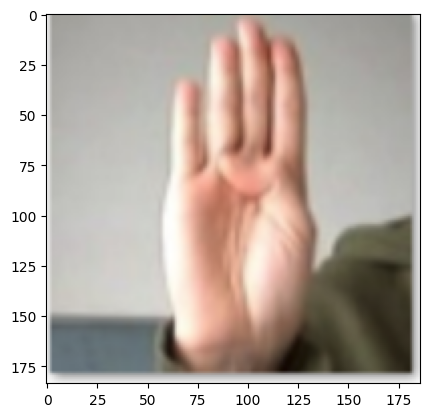

In [35]:
show_image('asl_images/b.png')

#### Dimensionando as imagens

As imagens em nosso conjunto de dados tinham 28x28 pixels e tons de cinza. Precisamos ter certeza de passar imagens do mesmo tamanho e tons de cinza em nosso método de previsão. Existem algumas maneiras de editar imagens com Python, mas Keras possui um utilitário integrado que funciona bem.

In [36]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

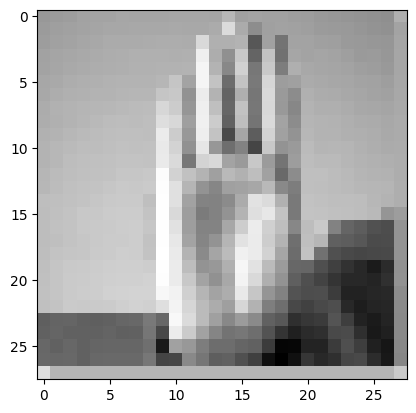

In [37]:
image = load_and_scale_image('asl_images/b.png')
plt.imshow(image, cmap='gray')

### Preparando a imagem para previsão

Agora que temos uma imagem em tons de cinza de 28x28 pixels, estamos perto de passá-la para nosso modelo de previsão. Primeiro, precisamos remodelar nossa imagem para corresponder ao formato do conjunto de dados no qual o modelo foi treinado. Antes de podermos remodelar, precisamos converter nossa imagem em um formato mais rudimentar. Faremos isso com um utilitário keras chamado image_to_array.

In [38]:
image = image_utils.img_to_array(image)

Agora podemos remodelar nossa imagem para deixá-la pronta para previsão.

In [39]:
# Esta remodelação corresponde a 1 imagem de 28x28 pixels com um canal de cor
image = image.reshape(1,28,28,1)

Finalmente, devemos lembrar de normalizar nossos dados (fazendo todos os valores entre 0-1), como fizemos com nosso conjunto de dados de treinamento:



In [40]:
image = image / 255

## **Fazendo previsões**

Ok, agora estamos prontos para prever! Isso é feito passando nossa imagem pré-processada para o método de previsão do modelo.

In [41]:
prediction = model.predict(image)
print(prediction)

1/1 [==============================] - 0s 227ms/step
[[8.5250806e-16 1.0000000e+00 2.4462354e-15 2.7849706e-25 2.2610646e-19
  3.6465602e-09 7.9340746e-23 5.7807951e-19 2.1268948e-12 6.5605824e-25
  6.4284098e-19 2.8430960e-33 9.9520933e-30 1.2242430e-25 3.8037120e-19
  3.8068562e-22 3.9992998e-31 5.0690797e-34 8.7353603e-34 2.2017981e-11
  7.4612036e-36 7.6419143e-10 6.5040649e-18 3.1195998e-19]]


#### Compreendendo a previsão

As previsões estão no formato de uma matriz de comprimento 24. Embora pareça um pouco diferente, este é o mesmo formato de nossos arrays categóricos "binarizados" de y_train e y_test. Cada elemento da matriz é uma probabilidade entre 0 e 1, representando a confiança para cada categoria. Vamos torná-lo um pouco mais legível. Podemos começar descobrindo qual elemento da matriz representa a maior probabilidade. Isso pode ser feito facilmente com a biblioteca **numpy** e a função **argmax**.

In [42]:
import numpy as np
np.argmax(prediction)

1

Cada elemento da matriz de predição representa uma letra possível no alfabeto da linguagem de sinais. Lembre-se de que j e z não são opções porque envolvem mover a mão e estamos lidando apenas com fotos estáticas. Vamos criar um mapeamento entre o índice do array de previsões e a letra correspondente.

In [43]:
# O alfabeto não contém j ou z porque requerem movimento
alphabet = "abcdefghiklmnopqrstuvwxy"

Agora podemos passar nosso índice de previsão para encontrar a letra correspondente.

In [44]:
alphabet[np.argmax(prediction)]

'b'

#### Juntando tudo

Vamos colocar tudo em uma função só para que possamos fazer previsões apenas a partir do arquivo de imagem.

In [45]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image/255
    prediction = model.predict(image)
    # converte previsão em letra
    predicted_letter = alphabet[np.argmax(prediction)]
    return predicted_letter

Vamos também usar a função com a letra 'a' no conjunto de dados asl_images:

1/1 [==============================] - 0s 22ms/step


'a'

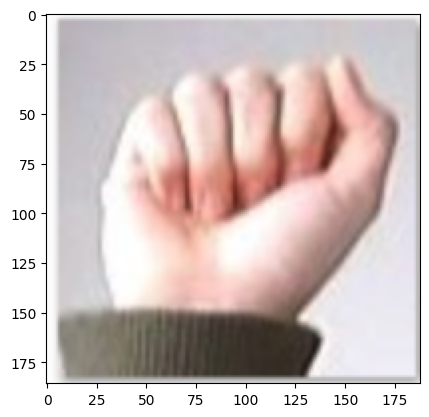

In [46]:
predict_letter("asl_images/a.png")

# **FIM**